Author: Emre Bozkurt

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from graph import Graph, is_connected

In [2]:
# Copy of Yashasvi's random graph generator
def create_random_graph(i, j):
    """
    Returns a Graph with i nodes and j edges.
    Ensures no 'multiples' (duplicate edges).
    """
    max_possible_edges = i * (i - 1) // 2
    j = min(j, max_possible_edges) # Safety cap

    G = Graph(i)
    
    # Generate all possible unique edge pairs
    all_possible_edges = []
    for u in range(i):
        for v in range(u + 1, i):
            all_possible_edges.append((u, v))
            
    # Randomly select j edges
    selected_edges = random.sample(all_possible_edges, j)
    
    for u, v in selected_edges:
        G.add_edge(u, v)
        
    return G

In [5]:
def run_connectivity_experiment(node_list, trials=200, points=25):
    """
    Fix n, sweep j, estimate P(connected) by Monte Carlo.
    """
    for n in node_list:
        threshold = (n * math.log(n)) / 2

        # sweep around the threshold
        j_values = np.linspace(
            int(0.2 * threshold),
            int(2.0 * threshold),
            points,
            dtype=int
        )

        probs = []
        scaled_x = []

        for j in j_values:
            connected_count = 0
            for _ in range(trials):
                G = create_random_graph(n, int(j))
                if is_connected(G):
                    connected_count += 1
            probs.append(connected_count / trials)
            scaled_x.append(j / threshold)

        plt.plot(scaled_x, probs, marker='o', label=f"n={n}")

    plt.axvline(1.0, color='red', linestyle='--', label='j = (n log n)/2')
    plt.xlabel("j / ((n log n)/2)")
    plt.ylabel("P(graph is connected)")
    plt.title("Connectivity Probability (Scaled by Theoretical Threshold)")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.show()


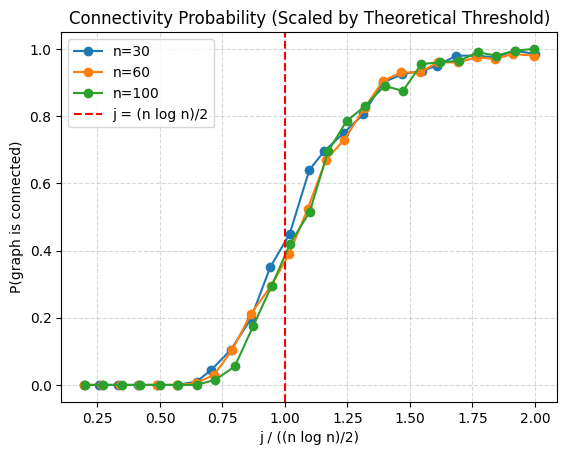

In [7]:
run_connectivity_experiment([30, 60, 100], trials=200)